## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [5]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:

def build_mlp(input_shape, output_units=10, num_neurons=[64, 32, 16], dropout_ratio=0.25):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for idx, n in enumerate(num_neurons):
        if idx == 0:
            x = keras.layers.Dense(
                units=n, 
                activation="relu", 
                name="hidden_layer%d" % (idx))(input_layer)
            x = keras.layers.Dropout(dropout_ratio)(x)
        else:
            x = keras.layers.Dense(
                units=n, 
                activation="relu",
                name="hidden_layer%d" % (idx))(x)
            x = keras.layers.Dropout(dropout_ratio)(x)
            
    output_layer = keras.layers.Dense(units=output_units, activation="softmax", name="output_layer")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[output_layer])
    
    return model
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.5, 0.75]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout ratio = %.6f" % (dropout_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], dropout_ratio=dropout_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "dropout-%s-SGD" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
    
for dropout_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout ratio = %.6f" % (dropout_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], dropout_ratio=dropout_ratio)
    model.summary()
#     optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer='adam')

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test),
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "dropout-%s-adam" % str(dropout_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout ratio = 0.250000
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer0 (Dense)        (None, 64)                196672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
______________________________________________

Epoch 43/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7478 - acc: 0.3610 - val_loss: 1.6133 - val_acc: 0.4251
Epoch 44/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.7442 - acc: 0.3642 - val_loss: 1.6157 - val_acc: 0.4279
Epoch 45/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7341 - acc: 0.3667 - val_loss: 1.6043 - val_acc: 0.4281
Epoch 46/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7348 - acc: 0.3681 - val_loss: 1.6060 - val_acc: 0.4244
Epoch 47/50
50000/50000 [==============================] - 2s 36us/step - loss: 1.7344 - acc: 0.3677 - val_loss: 1.5997 - val_acc: 0.4369
Epoch 48/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7291 - acc: 0.3689 - val_loss: 1.6077 - val_acc: 0.4283
Epoch 49/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.7247 - acc: 0.3709 - val_loss: 1.5910 - val_acc: 0.4375
Epoch 50/50
50000/50000 [=========

50000/50000 [==============================] - 2s 36us/step - loss: 2.0574 - acc: 0.2017 - val_loss: 1.9841 - val_acc: 0.2399
Epoch 42/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.0604 - acc: 0.1984 - val_loss: 1.9762 - val_acc: 0.2445
Epoch 43/50
50000/50000 [==============================] - 2s 35us/step - loss: 2.0574 - acc: 0.2001 - val_loss: 1.9776 - val_acc: 0.2436
Epoch 44/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.0517 - acc: 0.2001 - val_loss: 1.9770 - val_acc: 0.2390
Epoch 45/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.0512 - acc: 0.2065 - val_loss: 1.9692 - val_acc: 0.2434
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.0505 - acc: 0.2036 - val_loss: 1.9739 - val_acc: 0.2409
Epoch 47/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.0513 - acc: 0.2062 - val_loss: 1.9780 - val_acc: 0.2393
Epoch 48/50
50000/50000 [=====================

Epoch 40/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.3026 - acc: 0.0967 - val_loss: 2.3026 - val_acc: 0.0999
Epoch 41/50
50000/50000 [==============================] - 2s 35us/step - loss: 2.3026 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 42/50
50000/50000 [==============================] - 2s 35us/step - loss: 2.3026 - acc: 0.0973 - val_loss: 2.3026 - val_acc: 0.1002
Epoch 43/50
50000/50000 [==============================] - 2s 35us/step - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1001
Epoch 44/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.3022 - acc: 0.0964 - val_loss: 2.3005 - val_acc: 0.1281
Epoch 45/50
50000/50000 [==============================] - 2s 35us/step - loss: 2.3012 - acc: 0.1025 - val_loss: 2.2998 - val_acc: 0.1384
Epoch 46/50
50000/50000 [==============================] - 2s 36us/step - loss: 2.3000 - acc: 0.1049 - val_loss: 2.2998 - val_acc: 0.1374
Epoch 47/50
50000/50000 [=========

50000/50000 [==============================] - 2s 39us/step - loss: 1.9842 - acc: 0.2491 - val_loss: 1.9185 - val_acc: 0.3007
Epoch 39/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.9818 - acc: 0.2506 - val_loss: 1.8994 - val_acc: 0.2958
Epoch 40/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9830 - acc: 0.2476 - val_loss: 1.8981 - val_acc: 0.2968
Epoch 41/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9787 - acc: 0.2491 - val_loss: 1.9082 - val_acc: 0.2966
Epoch 42/50
50000/50000 [==============================] - 2s 39us/step - loss: 1.9789 - acc: 0.2519 - val_loss: 1.9044 - val_acc: 0.2916
Epoch 43/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.9794 - acc: 0.2501 - val_loss: 1.9109 - val_acc: 0.2941
Epoch 44/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9765 - acc: 0.2518 - val_loss: 1.9166 - val_acc: 0.2969
Epoch 45/50
50000/50000 [=====================

Epoch 37/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1858 - acc: 0.1617 - val_loss: 2.1511 - val_acc: 0.1748
Epoch 38/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1873 - acc: 0.1602 - val_loss: 2.1784 - val_acc: 0.1576
Epoch 39/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1877 - acc: 0.1592 - val_loss: 2.1617 - val_acc: 0.1698
Epoch 40/50
50000/50000 [==============================] - 2s 41us/step - loss: 2.1908 - acc: 0.1591 - val_loss: 2.1415 - val_acc: 0.1787
Epoch 41/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.1896 - acc: 0.1602 - val_loss: 2.1752 - val_acc: 0.1589
Epoch 42/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1851 - acc: 0.1602 - val_loss: 2.1587 - val_acc: 0.1696
Epoch 43/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.1863 - acc: 0.1600 - val_loss: 2.1563 - val_acc: 0.1715
Epoch 44/50
50000/50000 [=========

50000/50000 [==============================] - 2s 39us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3027 - acc: 0.0969 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 2s 40us/step - loss: 2.3027 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3027 - acc: 0.0981 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3027 - acc: 0.0986 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 2s 39us/step - loss: 2.3027 - acc: 0.0998 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 42/50
50000/50000 [=====================

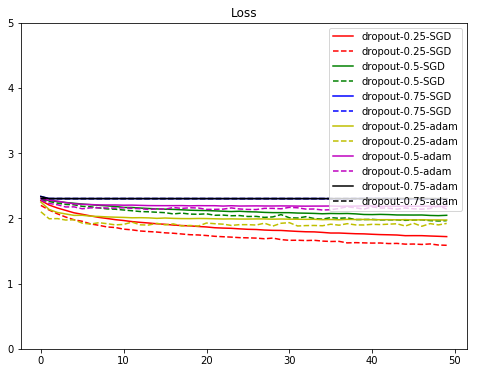

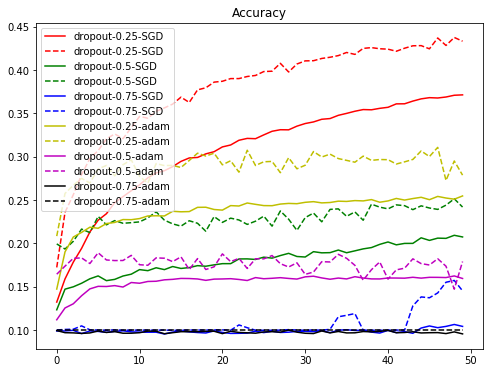

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()